# Homework 14 (Extra Credit)

In this assignment, we'll work through a few problems related to regression and least squares.

## Problem 1: Fitting polynomials and ridge regression

In this problem, we will practice fitting poynomials using least squares, and introduce ridge regression as a technique to limit the "complexity" of our fitted models.

The polynomials we will fit are of the form:

$$
f(x) = b_0 + b_1x + b_2 x^2 + \cdots + b_p x^p.
$$

Given $n$ training samples $(x_1,y_1),\dots,(x_n,y_n)$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$, we define the matrix

$$
X_p = \begin{pmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^p\\ 1 & x_2 & x_2^2 & \cdots & x_2^p\\ \vdots & \vdots & \vdots & \vdots &\vdots \\ 1 & x_n & x_n^2 & \cdots & x_n^p\end{pmatrix}
$$

which is an $n\times (p+1)$ matrix. The given $y = (y_1,\dots, y_n)$ and $b= (b_0,\dots,b_p)$, we can fit the polynomials using the least squares criteria:

$$
\hat{b}_p = \text{arg}\min_b \|X_pb - y\|_2^2 \implies \hat{b} = (X_p^\top X_p)^{-1}X_p^\top y.
$$

For this problem, we will use the training and testing data sets defined below.


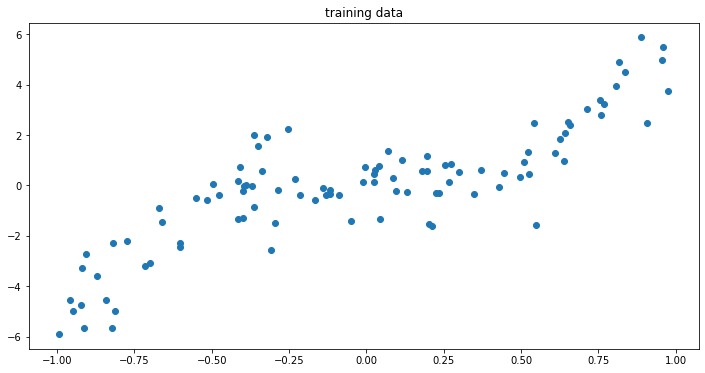

In [186]:
import numpy as np
import matplotlib.pyplot as plt

def get_data(n):
    x = np.random.uniform(low=-1, high=1, size=n)
    y = .01 * x + 10 * x**3 - 5*x**5 + np.random.standard_normal(n)
    return x, y

np.random.seed(10)
x_train, y_train = get_data(100)
x_test, y_test = get_data(500)

fig = plt.figure(figsize=(12,6))
plt.scatter(x_train, y_train)
plt.title('training data')
plt.show()

### Part A

Define a function `polynomial_features(x,p)` which takes in a vector of input data $x\in \mathbb{R}^n$ and returns the matrix $X_p$ of polynomial features of degree $p$. Then, define a function `fit_ls(Xp,y)` which takes in a matrix $X_p$ and a vector of responses $y$ and returns the least squares solution $\hat{b}_p = (X_p^\top X_p)^{-1}X_p^\top y$. (You should be able to use some code from the least squares notebook for this part.)

### Part B

For each $p\in \{1,2,3,\dots,20\}$, perform the following:

- compute $\hat{b}_p$.
- create a matrix $X_{p,\text{test}}$ (obtained from `polynomial_features(x_test,p)`), and compute and store the test error $E_p = \|X_{p,\text{test}}\hat{b}_p - y_\text{test}\|_2^2$.
- plot the errors $E_p$ as a function of $p$. Which value of $p$ has the lowest test error? What happens as $p$ gets very large?

### Part C
As we (hopefully) saw in Part B, as we fit a higher degree polynomial, we start to "overfit" the data, resulting in high test error. In this part, we show that one way to avoid this is by using _ridge regression_. In ridge regression, rather that using the using least squares objective, we pick coefficients $\hat{b}_\lambda$ which minimize the following objective:

$$
\begin{aligned}
\hat{b}_\lambda = \text{arg}\min_b \|Xb - y\|_2^2 + \lambda \|b\|_2^2 && (1)
\end{aligned}
$$

The additional term $\lambda \|b\|_2^2$ is a "penalty" term, which penalizes our model for having too large of coefficients. In practice, this penalty can help prevent us from overfitting the data like we did in Part B. Using some matrix calculus, it can be shown that the solution to (1) is given by

$$
\hat{b}_\lambda = (X^\top X + \lambda I)^{-1}X^\top y.
$$

where $I$ is the $(p+1)\times (p+1)$ identity matrix. For this problem, we will use the same training and testing data as before, and fix $p=20$. Perform the following:

- for each $\lambda$ in `np.arange(0,5,.1)`, compute $\hat{b}_\lambda = (X_{p}^\top X_{p} + \lambda I)^{-1}X_{p}^\top y$
- compute and store the test error $E_\lambda = \|X_{p,\text{test}}\hat{b}_\lambda - y_{\text{test}}\|_2^2$
- plot the test error $E_\lambda$ as a function of $\lambda$

What value of $\lambda$ gives the smallest test error? How does this error compare to the $p=20$ error from Part B? How does this error compare to the best model fit in Part B?

## Problem 2: gradient descent for least squares

In this problem, we investigate the _gradient algorithm_ for solving the least squares problem. Gradient descent algorithms are generic algorithms which can be used to minimize functions $f(x)$. Generically, the algorithm takes the form

$$
x^{(t+1)} = x^{(t)} - \alpha\cdot \nabla f(x^{(t)})
$$

where $\nabla f(x^{(t)})$ is the _gradient_ of $f$ (i.e. the vector whose $j$th entry is $\partial f(x)/\partial x_j$.)

In the case of least squares, our objective function is $f(b) = \|Xb - y\|_2^2$, for which the gradient is

$$
\nabla_b f(b) = 2(X^\top X b - X^\top y)
$$

which gives the gradient descent updates:

$$
b^{(t+1)} = b^{(t)} - 2\alpha\cdot  (X^\top X b^{(t)} - X^\top y).
$$

We can initialize $b^{(0)}$ to be, for example, a random vector. There are two more missing pieces that we need to run the gradient descent algorithm: 1) we need to choose the step size $\alpha$ and 2) we need to have a criteria for when to stop the iterations. In the case of linear regression, it turns out that the gradient descent algorithm will work for any $0 < \alpha < \frac{1}{2\lambda_{max}(X^\top X)}$, where $\lambda_{max}(X^\top X)$ is the largest eigenvalue of $X^\top X$. To decide how many iterations $T$ we need to run, a simple rule of thumb is to continue until $\|\nabla_b f(b^{(t)})\|_2$ is sufficiently small, say below some threshold $\epsilon$ (this means that $\nabla_b f(b^{(t)}) \approx 0$, so that we are approximately at the minimum).

**Remark:** Iterative algorithms like gradient descent and Newton's method are rarely used in practice with linear least squares problems, since we have closed-form solutions that are usually used in practice. However, these algorithms are much more general, and can be applied to a wide variety of minimization problems that don't admit closed-form solutions. For example, gradient descent (and variants of it) are the standard method for training deep neural networks.

For this problem, we'll use the following synthetic data.

In [203]:
n = 100
p = 10

X = np.random.normal(size=(n,p))
y = np.dot(X, np.random.randn(p)) + .1*np.random.randn(n)

### Part A

Implement a function `gradient_descent_ls(X,y,alpha,eps)` which runs gradient descent with a step size $\alpha$, until $\|\nabla_b f(b)\|_2 \leq \epsilon$. At each iteration $t$, compute and store the MSE $\|Xb^{(t)} - y\|_2^2$. Your function should return the final solution $\hat{b}$ and a list of error from each iteration.

### Part B
Using the synethetic data above and your `gradient_descent_ls` function, run gradient descent for a variety of values $\alpha \in \left(0,\frac{1}{2\lambda_{max}(X^\top X)}\right)$ (say, 5 different values). You can use a reasonable threshold for the termination condition, for example $\epsilon = 0.1$. For each run, plot the errors as a function of the number of iterations. For which step size does the algorithm converge the fastest?